In [1]:
import os
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.decomposition import PCA
import plotly.figure_factory as ff

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pickle

In [3]:
output_path = "/data/projects/Tissue_specific_data/clustering/results/0.5/only_greater/0.8_without_testis"
processed_path = "/data/projects/Tissue_specific_data/clustering/processed_data/"
file_name  = "0.5_only_greater_0.8_without_testis"

In [4]:
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [5]:
df = pd.read_csv("/data/projects/Tissue_specific_data/clustering/inputs/0.5/only_greater/0.8/0.5.csv")
df = df.set_index('tissue')
df = df.drop(['Testis'])

In [6]:
df

,ENST00000373020.8,ENST00000494424.1,ENST00000496771.5,ENST00000612152.4,ENST00000614008.4,ENST00000373031.4,ENST00000485971.1,ENST00000371582.8,ENST00000371584.8,ENST00000371588.9,...,ENST00000640733.1,ENST00000640778.1,ENST00000640881.1,ENST00000640932.1,ENST00000523332.5,ENST00000615007.4,ENST00000638789.1,ENST00000640006.1,ENST00000639687.1,ENST00000622217.1
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,1.00,0.00,0.98,0.92,0.64,0.99,0.95,0.92,0.79,1.00,...,0.00,0.00,0.00,0.0,0.03,0.30,0.00,0.58,0.0,0.29
Adrenal_Gland,1.00,0.00,0.47,0.46,0.22,0.02,0.01,0.91,0.83,1.00,...,0.00,0.00,0.00,0.0,0.00,0.86,0.00,0.37,0.0,0.18
Bladder,1.00,0.00,0.90,0.57,0.33,0.14,0.00,1.00,0.90,1.00,...,0.00,0.00,0.00,0.0,0.48,0.71,0.00,0.86,0.0,0.33
Blood,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.42,0.96,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.52,0.0,0.33
Blood_Vessel,1.00,0.00,0.72,0.27,0.28,0.29,0.06,0.89,0.78,1.00,...,0.00,0.00,0.00,0.0,0.84,0.98,0.01,0.08,0.0,0.17
Brain,1.00,0.00,0.45,0.24,0.06,0.02,0.00,0.65,0.46,1.00,...,0.00,0.00,0.00,0.0,0.00,0.85,0.00,0.09,0.0,0.01
Breast,1.00,0.01,0.98,0.98,0.51,0.97,0.89,0.91,0.82,1.00,...,0.00,0.01,0.00,0.0,0.00,0.43,0.00,0.76,0.0,0.28
Cervix_Uteri,1.00,0.00,1.00,0.95,0.47,0.05,0.00,0.89,0.95,1.00,...,0.00,0.00,0.00,0.0,0.21,0.89,0.05,0.95,0.0,0.42
Colon,1.00,0.00,0.97,0.67,0.47,0.27,0.06,0.91,0.79,1.00,...,0.00,0.00,0.00,0.0,0.73,0.78,0.00,0.85,0.0,0.33


In [7]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [8]:
df_temp = pd.DataFrame(df.apply(cv), columns=['Coefficien Variaence']).reset_index()
df_temp = df_temp.sort_values(by='Coefficien Variaence', ascending=False)
df_temp.rename(columns = {'index':'Transcript'}, inplace = True)
df_temp

/tmp/ipykernel_749401/9528921.py:1: RuntimeWarning: invalid value encountered in scalar divide
  cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100


,Transcript,Coefficien Variaence
24064,ENST00000441382.1,538.516481
87681,ENST00000604757.1,538.516481
26599,ENST00000484428.5,538.516481
78788,ENST00000424250.2,538.516481
26003,ENST00000372741.7,538.516481
...,...,...
90612,ENST00000638243.1,NaN
90613,ENST00000638815.1,NaN
90615,ENST00000638997.1,NaN
90619,ENST00000640932.1,NaN


In [9]:
n = 25
df_25 = df_temp.head(int(len(df_temp)*(n/100)))
df_25

,Transcript,Coefficien Variaence
24064,ENST00000441382.1,538.516481
87681,ENST00000604757.1,538.516481
26599,ENST00000484428.5,538.516481
78788,ENST00000424250.2,538.516481
26003,ENST00000372741.7,538.516481
...,...,...
3121,ENST00000522823.5,85.026097
54051,ENST00000576537.1,85.022633
45465,ENST00000498033.5,85.019875
72842,ENST00000560102.1,85.002816


## Important Transcripts for Clustering

In [10]:
transcript_list = df_25['Transcript'].to_list()

In [11]:
len(transcript_list)

22656

In [12]:
df_clustering = df[transcript_list]
df_clustering

,ENST00000441382.1,ENST00000604757.1,ENST00000484428.5,ENST00000424250.2,ENST00000372741.7,ENST00000456728.1,ENST00000621682.4,ENST00000413632.6,ENST00000441065.2,ENST00000470251.1,...,ENST00000510535.1,ENST00000609870.5,ENST00000339024.8,ENST00000517914.1,ENST00000505748.5,ENST00000522823.5,ENST00000576537.1,ENST00000498033.5,ENST00000560102.1,ENST00000433660.1
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.06,0.44,0.23,0.26,0.18,0.55,0.22,0.05,0.36,0.02
Adrenal_Gland,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,...,0.23,0.13,0.81,0.03,0.30,0.04,0.15,0.11,0.16,0.01
Bladder,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.62,0.67,0.19,0.19,0.57,0.38,0.57,0.05,0.38,0.00
Blood,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.05,0.98,0.09,0.12,0.00,0.76,0.66,0.00,0.00,0.01
Blood_Vessel,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.19,0.26,0.58,0.45,0.19,0.26,0.15,0.19,0.09,0.09
Brain,0.00,0.00,0.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.08,0.02,0.01,0.36,0.03,0.45,0.01,0.00,0.06
Breast,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.21,0.20,0.36,0.13,0.40,0.15,0.17,0.12,0.07
Cervix_Uteri,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.37,0.16,0.37,0.32,0.68,0.11,0.00,0.00,0.58,0.05
Colon,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.26,0.44,0.15,0.25,0.37,0.18,0.11,0.04,0.67,0.07


In [13]:
df_clustering.to_csv(processed_path+"/df_clustering_"+file_name+".csv", index=False)
with open(processed_path+"/important_transcripts_"+file_name+".txt", "w") as output:
    output.write(str(transcript_list))

## Kmeans clustering 

In [14]:
sil_list = []
for k in range(2,7):
    print(k)
    cluster = KMeans(n_clusters=k).fit(df_clustering)
    labels = cluster.labels_
    sil_score = metrics.silhouette_score(df_clustering, labels)
    sil_list.append(sil_score)
    print("Silhoutte Score: ",sil_score)
    for i in range(k):
        index_cluster=np.where(labels==i) # get indexes of points in cluster 0 
        print("Tissues in cluster_{}:".format(i), df_clustering.index[index_cluster].tolist())
    
    print("\n\n")

2


/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score:  0.2647594655321009
Tissues in cluster_0: ['Brain', 'Pituitary']
Tissues in cluster_1: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']



3


/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score:  0.14373861182826617
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Brain', 'Pituitary']
Tissues in cluster_2: ['Blood', 'Lung', 'Spleen']



4


/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score:  0.048307509033426156
Tissues in cluster_0: ['Brain', 'Pituitary']
Tissues in cluster_1: ['Adrenal_Gland', 'Blood', 'Colon', 'Heart', 'Kidney', 'Liver', 'Muscle', 'Pancreas', 'Small_Intestine', 'Stomach']
Tissues in cluster_2: ['Adipose_Tissue', 'Bladder', 'Blood_Vessel', 'Breast', 'Esophagus', 'Lung', 'Nerve', 'Prostate', 'Salivary_Gland', 'Skin', 'Spleen', 'Thyroid', 'Vagina']
Tissues in cluster_3: ['Cervix_Uteri', 'Fallopian_Tube', 'Ovary', 'Uterus']



5


/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score:  0.07830503432294135
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood_Vessel', 'Breast', 'Colon', 'Esophagus', 'Kidney', 'Liver', 'Lung', 'Nerve', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Stomach', 'Thyroid', 'Vagina']
Tissues in cluster_1: ['Cervix_Uteri', 'Fallopian_Tube', 'Ovary', 'Uterus']
Tissues in cluster_2: ['Heart', 'Muscle']
Tissues in cluster_3: ['Brain', 'Pituitary']
Tissues in cluster_4: ['Blood', 'Spleen']



6


/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score:  0.08242714496077605
Tissues in cluster_0: ['Brain', 'Pituitary']
Tissues in cluster_1: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Colon', 'Esophagus', 'Kidney', 'Lung', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Stomach', 'Thyroid', 'Vagina']
Tissues in cluster_2: ['Cervix_Uteri', 'Fallopian_Tube', 'Nerve', 'Ovary', 'Uterus']
Tissues in cluster_3: ['Liver']
Tissues in cluster_4: ['Heart', 'Muscle']
Tissues in cluster_5: ['Spleen']





## Hierarchical Clustering

In [19]:
linkage_style= "average"

for k in range(2,7):
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage=linkage_style, affinity='euclidean')
    hier_cluster = agglomerative.fit(df_clustering)
    hlabels = hier_cluster.labels_ 
    #print(k, hlabels, hier_cluster)
    score = metrics.silhouette_score(df_clustering,hlabels)
    print ("Silhouette Score", score)
    for i in range(k):
        index_cluster=np.where(hlabels==i) # get indexes of points in cluster 0 
        print("Tissues in cluster_{}:".format(i), df_clustering.index[index_cluster].tolist())
    
    print("\n\n")

/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Silhouette Score 0.2647594655321009
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Brain', 'Pituitary']



Silhouette Score 0.17679826510718807
Tissues in cluster_0: ['Brain', 'Pituitary']
Tissues in cluster_1: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_2: ['Liver']





/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Silhouette Score 0.16130912605809578
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Pituitary']
Tissues in cluster_2: ['Liver']
Tissues in cluster_3: ['Brain']



Silhouette Score 0.12145728039508763
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Thyroid']
Tissues in cluster_2: ['Liver']
Tissues in cluster_3: ['Brain']
Tissues in cluster_4: ['Pituitary']



Silhouette Score 0.095602

/shared/software/anaconda/anaconda3/envs/basic_processing/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



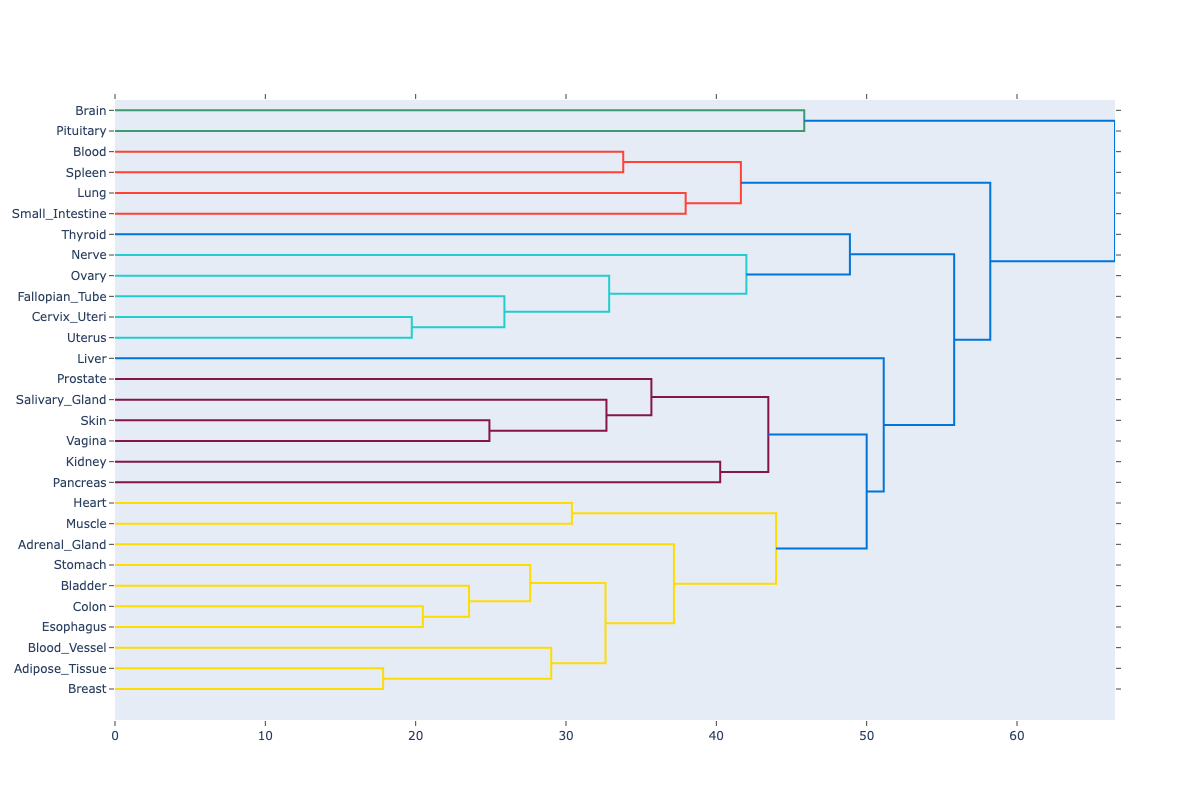

In [20]:
names = df_clustering.index.tolist()
fig = ff.create_dendrogram(df_clustering, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()